In [1]:
# Install Kaggle API
!pip install kaggle



In [2]:
# Upload your Kaggle API token
from google.colab import files
files.upload()  # upload the kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saqibtech","key":"5c8318b9283078ef766a69b247f91b9c"}'}

In [3]:
# Move the kaggle.json file to the correct directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
# Download the dataset
!kaggle datasets download -d uditsharma72/real-vs-fake-faces


Dataset URL: https://www.kaggle.com/datasets/uditsharma72/real-vs-fake-faces

License(s): CC0-1.0


 99% 214M/215M [00:12<00:00, 23.7MB/s]

100% 215M/215M [00:12<00:00, 18.6MB/s]


In [5]:
# Unzip the dataset
!unzip real-vs-fake-faces.zip

Archive:  real-vs-fake-faces.zip

  inflating: fake/easy_100_1111.jpg  

  inflating: fake/easy_101_0010.jpg  

  inflating: fake/easy_102_0101.jpg  

  inflating: fake/easy_103_1111.jpg  

  inflating: fake/easy_104_1000.jpg  

  inflating: fake/easy_105_1100.jpg  

  inflating: fake/easy_106_0011.jpg  

  inflating: fake/easy_107_1011.jpg  

  inflating: fake/easy_108_1111.jpg  

  inflating: fake/easy_109_1111.jpg  

  inflating: fake/easy_10_0001.jpg   

  inflating: fake/easy_110_0001.jpg  

  inflating: fake/easy_111_1101.jpg  

  inflating: fake/easy_112_1001.jpg  

  inflating: fake/easy_113_0011.jpg  

  inflating: fake/easy_114_1110.jpg  

  inflating: fake/easy_115_0010.jpg  

  inflating: fake/easy_116_111.jpg   

  inflating: fake/easy_117_0101.jpg  

  inflating: fake/easy_118_1111.jpg  

  inflating: fake/easy_119_0011.jpg  

  inflating: fake/easy_11_1111.jpg   

  inflating: fake/easy_120_0011.jpg  

  inflating: fake/easy_121_0011.jpg  

  inflating: fake/easy_122_101

**Extract and Move Folders to a Single Directory**

In [6]:
import os
import shutil

# Create a new directory to hold both `fake` and `real` folders
base_path = '/content/real-vs-fake-faces'
os.makedirs(base_path, exist_ok=True)

# Move the `fake` and `real` folders to the new directory
shutil.move('/content/fake', base_path)
shutil.move('/content/real', base_path)


'/content/real-vs-fake-faces/real'

**Importing Libraries and Loading Data**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping



In [8]:

# Defining paths
real_faces_path = '/content/real-vs-fake-faces/real'
fake_faces_path = '/content/real-vs-fake-faces/fake'


In [17]:
base_path = '/content/real-vs-fake-faces'

# Initialize image data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create training data generator
train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Create validation data generator
validation_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)



Found 1633 images belonging to 2 classes.

Found 408 images belonging to 2 classes.


**Building the CNN Model**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [20]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_2"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       

                                                                 

 batch_normalization (Batch  (None, 126, 126, 32)      128       

 Normalization)                                                  

                                                                 

 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0         

 g2D)                                                            

                                                                 

 dropout_2 (Dropout)         (None, 63, 63, 32)        0         

                                                                 

 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     

                                                                 

 batch_normalization_1 (Bat  (None, 61

**Training the Model**

In [21]:

from tensorflow.keras.callbacks import EarlyStopping

# stop early to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)


Epoch 1/20

52/52 [==============================] - 30s 521ms/step - loss: 2.2640 - accuracy: 0.4985 - val_loss: 6.7905 - val_accuracy: 0.4706

Epoch 2/20

52/52 [==============================] - 24s 470ms/step - loss: 0.7042 - accuracy: 0.5230 - val_loss: 2.2670 - val_accuracy: 0.5049

Epoch 3/20

52/52 [==============================] - 24s 464ms/step - loss: 0.6914 - accuracy: 0.5346 - val_loss: 3.4665 - val_accuracy: 0.5294

Epoch 4/20

52/52 [==============================] - 24s 460ms/step - loss: 0.6912 - accuracy: 0.5419 - val_loss: 1.2437 - val_accuracy: 0.5294

Epoch 5/20

52/52 [==============================] - 24s 466ms/step - loss: 0.6925 - accuracy: 0.5456 - val_loss: 0.7373 - val_accuracy: 0.5294

Epoch 6/20

52/52 [==============================] - 25s 488ms/step - loss: 0.6912 - accuracy: 0.5309 - val_loss: 0.6941 - val_accuracy: 0.5270

Epoch 7/20

52/52 [==============================] - 29s 566ms/step - loss: 0.6931 - accuracy: 0.5352 - val_loss: 0.6996 - val_acc

**Evaluating the Model**

In [22]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')




13/13 [==============================] - 4s 328ms/step - loss: 0.7084 - accuracy: 0.5294

Validation Loss: 0.7084324955940247

Validation Accuracy: 0.529411792755127


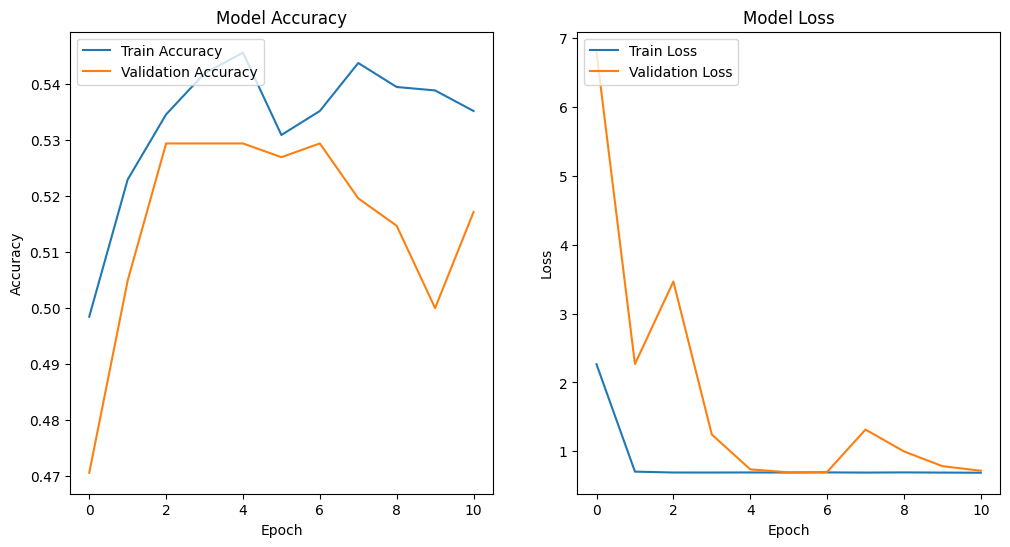

In [23]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

In [24]:
# Save the model
model.save('real_vs_fake_model.h5')